# Random Forest

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('combined_data.csv', delimiter=';')

# Preprocessing: Convert Timestamp to datetime and extract hour for better prediction
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['Hour'] = data['Timestamp'].dt.hour

In [21]:

features = ['Module Temperature', 'Irradiance', 'Temperature', 'Humidity', 'Pressure', 'Wind Speed', 'Wind Direction', 'Rain', 'Hour']
target = 'PV yield counter'


In [22]:
X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
random_forest_model = RandomForestRegressor(n_estimators=200, max_depth=None, min_samples_leaf=2, min_samples_split=2, random_state=50)
random_forest_model.fit(X_train, y_train)

predictions = random_forest_model.predict(X_test)

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
r2 = r2_score(y_test, predictions)

average_y_test = y_test.mean()
average_predictions = predictions.mean()

mape = abs((average_y_test - average_predictions) / average_y_test) * 100

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R^2 Score: {r2}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')


Mean Absolute Error (MAE): 5.5557729794089274
Mean Squared Error (MSE): 153.8762912323067
Root Mean Squared Error (RMSE): 12.404688276305322
R^2 Score: 0.9299254781098786
Mean Absolute Percentage Error (MAPE): 0.88%


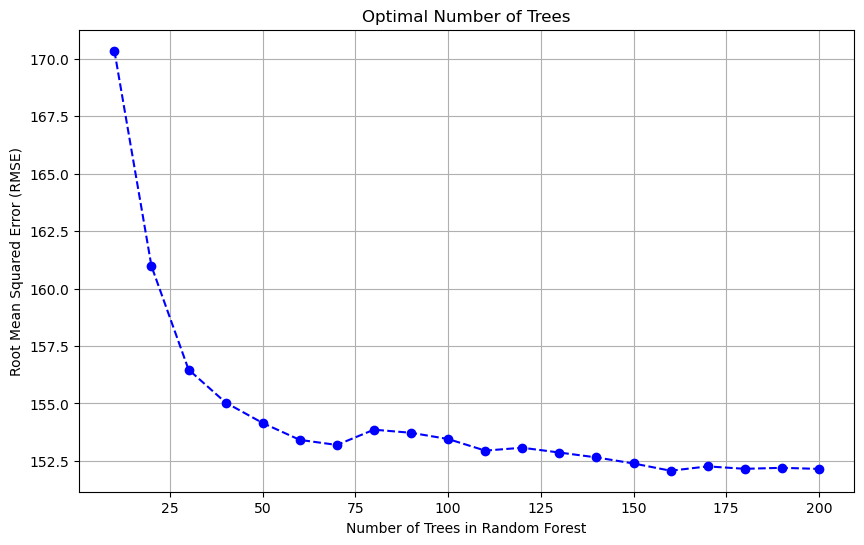

In [7]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

estimator_range = range(10, 201, 10)

cv_scores = []
for estimator in estimator_range:
    model = RandomForestRegressor(n_estimators=estimator, random_state=42)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_scores.append(-scores.mean())

plt.figure(figsize=(10, 6))
plt.plot(estimator_range, cv_scores, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Trees in Random Forest')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Optimal Number of Trees')
plt.grid(True)
plt.show()


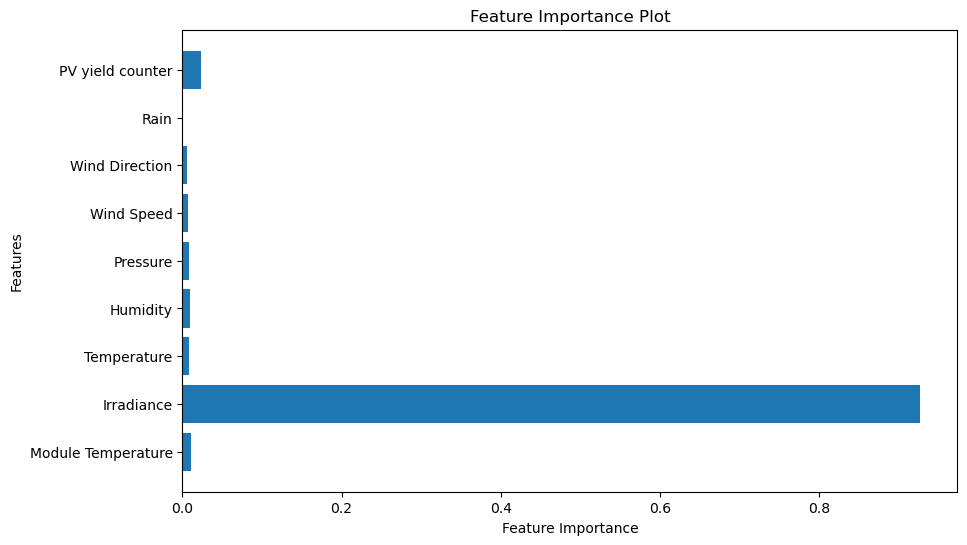

In [25]:
# Assuming your model is already trained and named 'random_forest_model'
import matplotlib.pyplot as plt

feature_importances = random_forest_model.feature_importances_

features_all = ['Module Temperature', 'Irradiance', 'Temperature', 'Humidity', 'Pressure', 'Wind Speed', 'Wind Direction', 'Rain', 'PV yield counter']

plt.figure(figsize=(10, 6))
plt.barh(features_all, feature_importances, align='center')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()


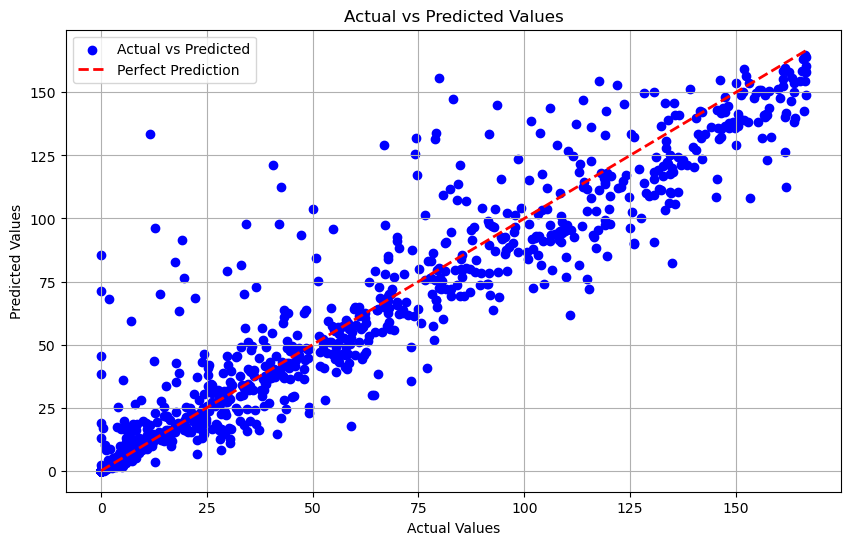

In [13]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


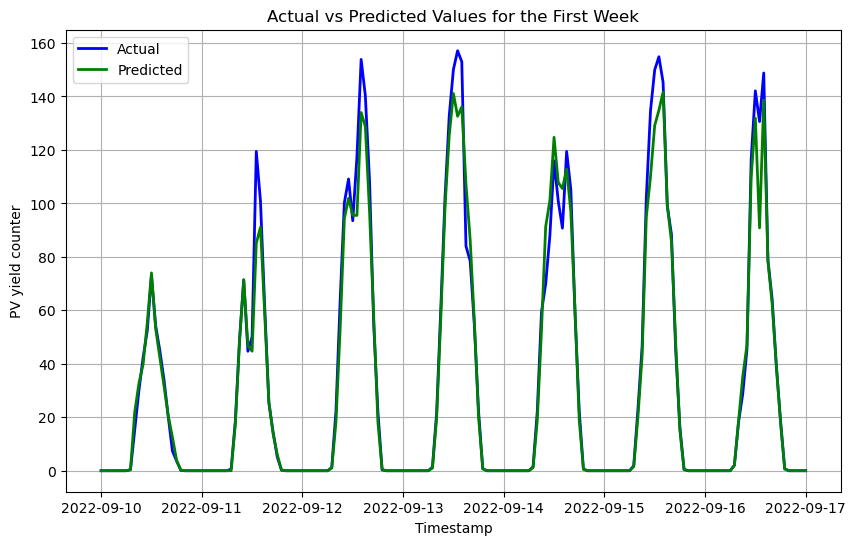

In [14]:
# Filter data for the first week (assuming 'Timestamp' column is in datetime format)
first_week_data = data[data['Timestamp'] <= data['Timestamp'].iloc[0] + pd.DateOffset(7)]

X_first_week = first_week_data[features]
y_first_week_actual = first_week_data[target]

predictions_first_week = random_forest_model.predict(X_first_week)

plt.figure(figsize=(10, 6))

plt.plot(first_week_data['Timestamp'], y_first_week_actual, color='blue', label='Actual', linewidth=2)
plt.plot(first_week_data['Timestamp'], predictions_first_week, color='green', label='Predicted', linewidth=2)

plt.xlabel('Timestamp')
plt.ylabel('PV yield counter')
plt.title('Actual vs Predicted Values for the First Week')
plt.legend()
plt.grid(True)
plt.show()


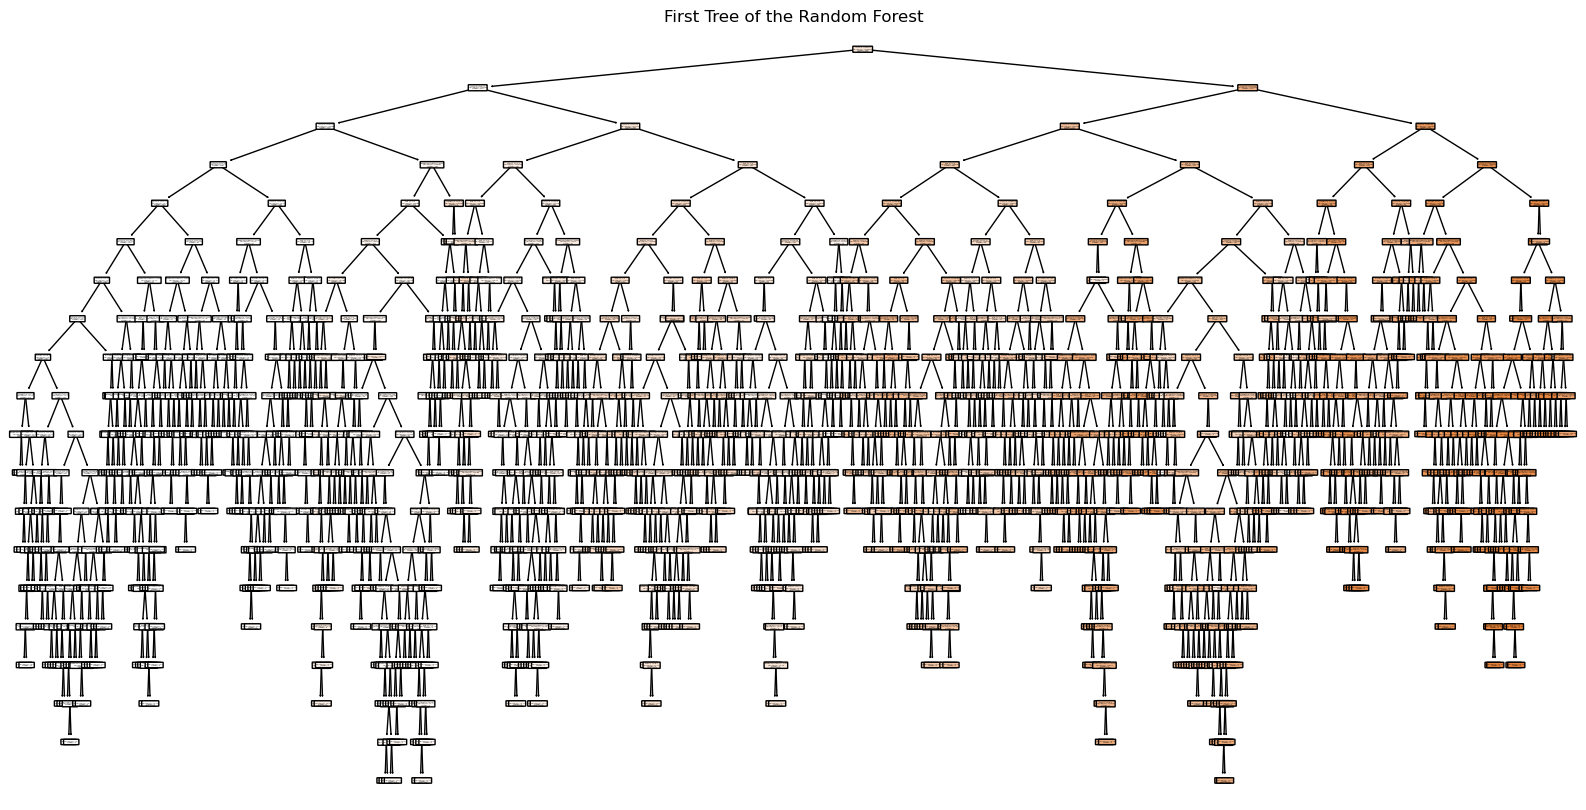

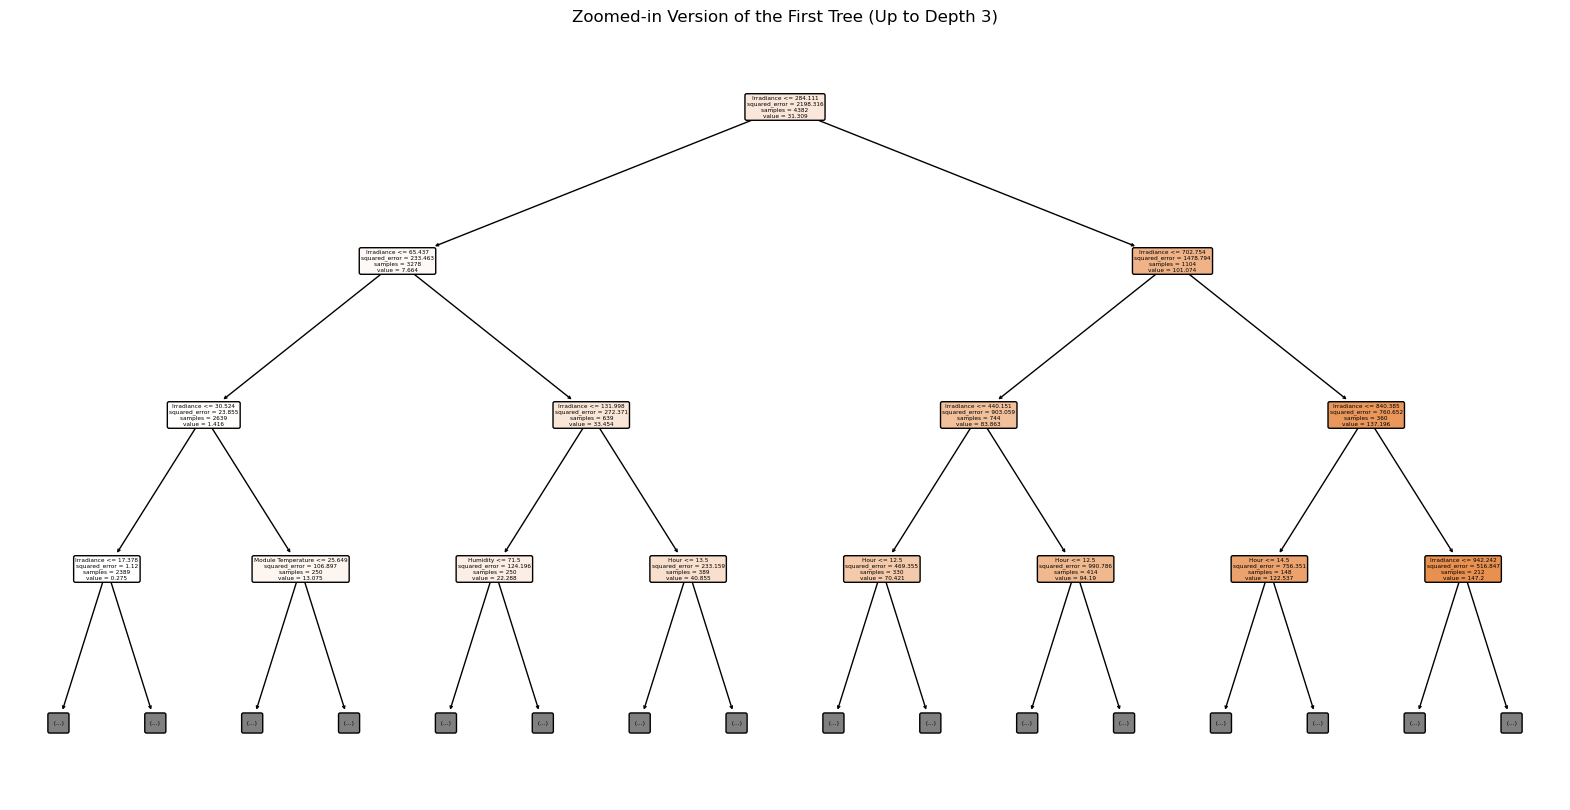

In [19]:
from sklearn.tree import plot_tree

# Get the first tree from the Random Forest model
first_tree = random_forest_model.estimators_[0]

# Plot the entire first tree
plt.figure(figsize=(20, 10))
plot_tree(first_tree, filled=True, feature_names=features, rounded=True)
plt.title('First Tree of the Random Forest')
plt.show()

# If you want to zoom in on a specific part of the tree, specify the max_depth parameter
# For example, to zoom in on the first 3 levels of the tree:
plt.figure(figsize=(20, 10))
plot_tree(first_tree, filled=True, feature_names=features, rounded=True, max_depth=3)
plt.title('Zoomed-in Version of the First Tree (Up to Depth 3)')
plt.show()


# Ocotber 2022

October 2022 Metrics:
MAE: 4.29
MSE: 103.93
RMSE: 10.19
R^2: 0.96
MAPE: 3.07%
First Week in October 2022 Metrics:
MAE: 4.58
MSE: 112.05
RMSE: 10.59
R^2: 0.95
MAPE: 2.18%
First Day in October 2022 Metrics:
MAE: 6.19
MSE: 208.87
RMSE: 14.45
R^2: 0.90
MAPE: 12.03%


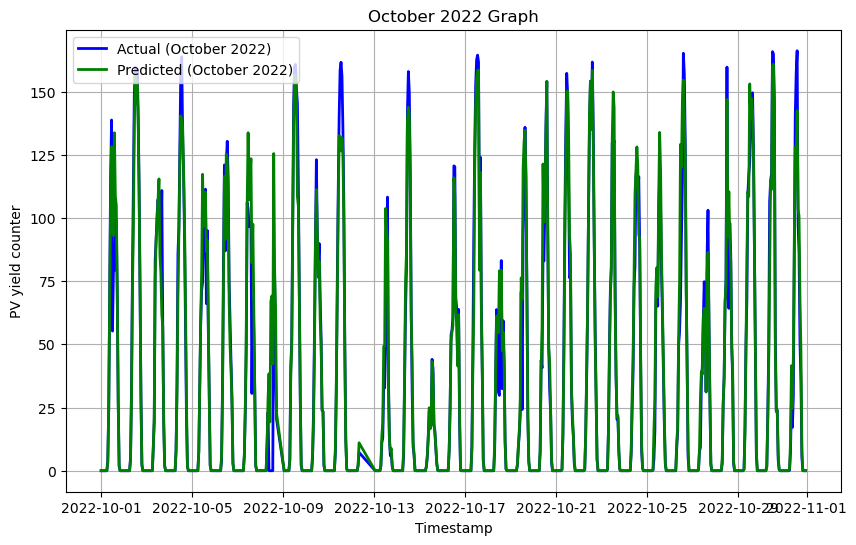

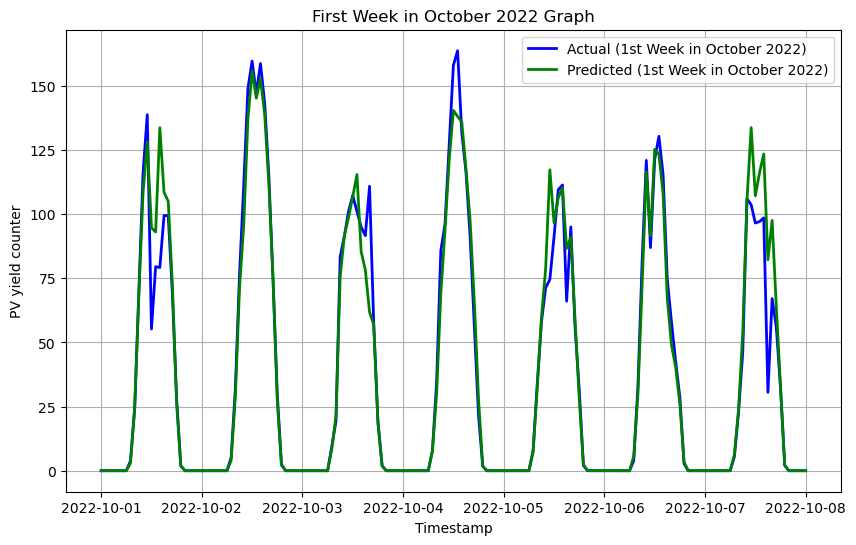

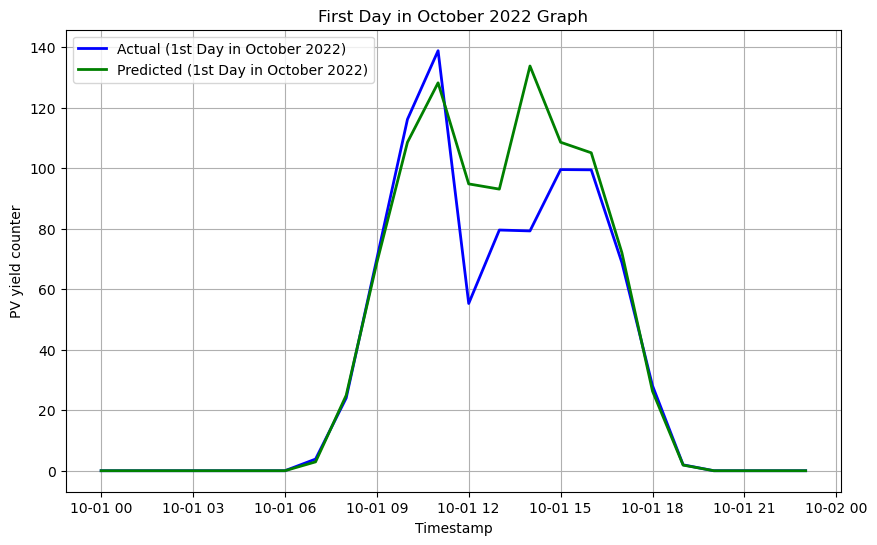

In [34]:
# Filter data for October 2022
october_data = data[(data['Timestamp'].dt.year == 2022) & (data['Timestamp'].dt.month == 10)]

# Filter data for the first week in October 2022
first_week_october_data = october_data[(october_data['Timestamp'] >= october_data['Timestamp'].iloc[0]) & 
                                        (october_data['Timestamp'] <= october_data['Timestamp'].iloc[0] + pd.DateOffset(7))]

# Filter data for the first day in October 2022
first_day_october_data = october_data[(october_data['Timestamp'] >= october_data['Timestamp'].iloc[0]) & 
                                       (october_data['Timestamp'].dt.day == 1)]

# Features and target variable for each subset of data
X_october = october_data[features]
y_october_actual = october_data[target]

X_first_week_october = first_week_october_data[features]
y_first_week_october_actual = first_week_october_data[target]

X_first_day_october = first_day_october_data[features]
y_first_day_october_actual = first_day_october_data[target]

# Make predictions for each subset of data
predictions_october = random_forest_model.predict(X_october)
predictions_first_week_october = random_forest_model.predict(X_first_week_october)
predictions_first_day_october = random_forest_model.predict(X_first_day_october)

# Calculate metrics and MAPE for each subset of data
mae_october = mean_absolute_error(y_october_actual, predictions_october)
mse_october = mean_squared_error(y_october_actual, predictions_october)
rmse_october = mean_squared_error(y_october_actual, predictions_october, squared=False)
r2_october = r2_score(y_october_actual, predictions_october)

average_y_first_week_october = y_first_week_october_actual.mean()
average_predictions_first_week_october = predictions_first_week_october.mean()
mape_first_week_october = abs((average_y_first_week_october - average_predictions_first_week_october) / average_y_first_week_october) * 100

average_y_first_day_october = y_first_day_october_actual.mean()
average_predictions_first_day_october = predictions_first_day_october.mean()
mape_first_day_october = abs((average_y_first_day_october - average_predictions_first_day_october) / average_y_first_day_october) * 100

# Print metrics for October 2022 subsets
print("October 2022 Metrics:")
print(f'MAE: {mae_october:.2f}')
print(f'MSE: {mse_october:.2f}')
print(f'RMSE: {rmse_october:.2f}')
print(f'R^2: {r2_october:.2f}')
print(f'MAPE: {mape_october:.2f}%')

print("First Week in October 2022 Metrics:")
print(f'MAE: {mae_first_week_october:.2f}')
print(f'MSE: {mse_first_week_october:.2f}')
print(f'RMSE: {rmse_first_week_october:.2f}')
print(f'R^2: {r2_first_week_october:.2f}')
print(f'MAPE: {mape_first_week_october:.2f}%')

print("First Day in October 2022 Metrics:")
print(f'MAE: {mae_first_day_october:.2f}')
print(f'MSE: {mse_first_day_october:.2f}')
print(f'RMSE: {rmse_first_day_october:.2f}')
print(f'R^2: {r2_first_day_october:.2f}')
print(f'MAPE: {mape_first_day_october:.2f}%')

# Plot and print results for October 2022
plt.figure(figsize=(10, 6))
plt.plot(october_data['Timestamp'], y_october_actual, color='blue', label='Actual (October 2022)', linewidth=2)
plt.plot(october_data['Timestamp'], predictions_october, color='green', label='Predicted (October 2022)', linewidth=2)
plt.xlabel('Timestamp')
plt.ylabel('PV yield counter')
plt.title('October 2022 Graph')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(first_week_october_data['Timestamp'], y_first_week_october_actual, color='blue', label='Actual (1st Week in October 2022)', linewidth=2)
plt.plot(first_week_october_data['Timestamp'], predictions_first_week_october, color='green', label='Predicted (1st Week in October 2022)', linewidth=2)
plt.xlabel('Timestamp')
plt.ylabel('PV yield counter')
plt.title('First Week in October 2022 Graph')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(first_day_october_data['Timestamp'], y_first_day_october_actual, color='blue', label='Actual (1st Day in October 2022)', linewidth=2)
plt.plot(first_day_october_data['Timestamp'], predictions_first_day_october, color='green', label='Predicted (1st Day in October 2022)', linewidth=2)
plt.xlabel('Timestamp')
plt.ylabel('PV yield counter')
plt.title('First Day in October 2022 Graph')
plt.legend()
plt.grid(True)
plt.show()

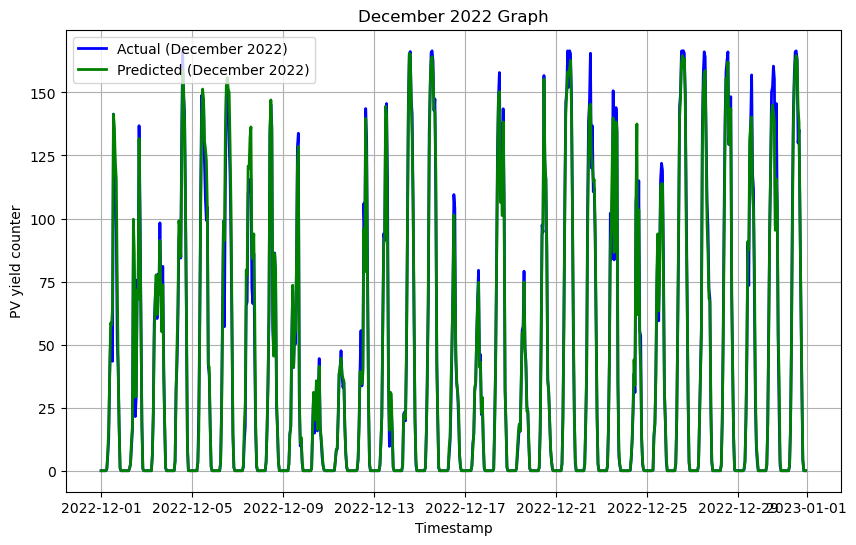

December 2022 Metrics:
MAE: 2.56
MSE: 27.66
RMSE: 5.26
R^2: 0.99
MAPE: 0.25%


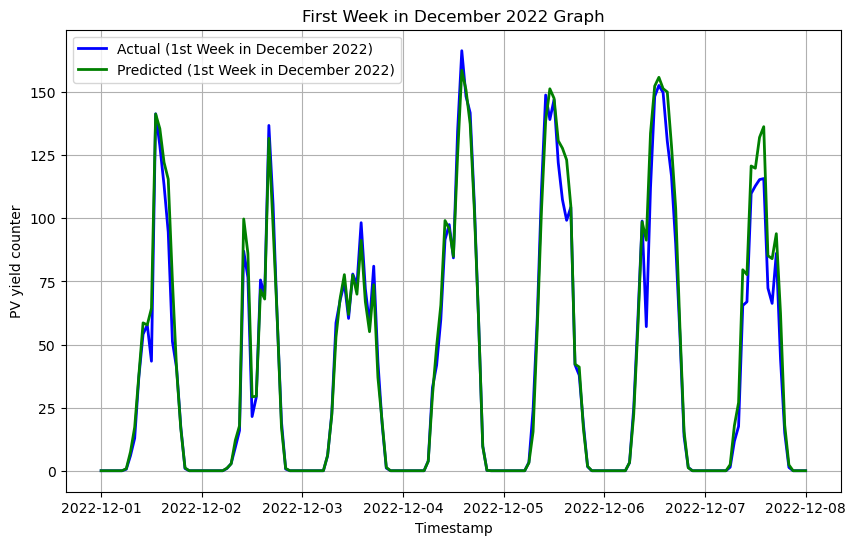

First Week in December 2022 Metrics:
MAE: 3.75
MSE: 51.78
RMSE: 7.20
R^2: 0.98
MAPE: 5.49%


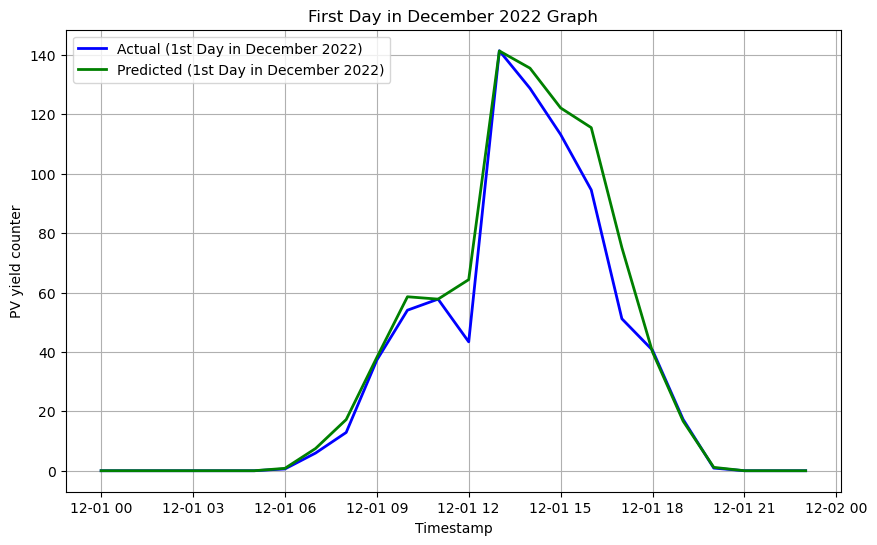

First Day in December 2022 Metrics:
MAE: 3.94
MSE: 67.59
RMSE: 8.22
R^2: 0.96
MAPE: 11.52%


In [35]:
# Filter data for December 2022
december_data = data[(data['Timestamp'].dt.year == 2022) & (data['Timestamp'].dt.month == 12)]

first_week_december_data = december_data[(december_data['Timestamp'] >= december_data['Timestamp'].iloc[0]) & 
                                        (december_data['Timestamp'] <= december_data['Timestamp'].iloc[0] + pd.DateOffset(7))]

first_day_december_data = december_data[(december_data['Timestamp'] >= december_data['Timestamp'].iloc[0]) & 
                                       (december_data['Timestamp'].dt.day == 1)]

X_december = december_data[features]
y_december_actual = december_data[target]

X_first_week_december = first_week_december_data[features]
y_first_week_december_actual = first_week_december_data[target]

X_first_day_december = first_day_december_data[features]
y_first_day_december_actual = first_day_december_data[target]

predictions_december = random_forest_model.predict(X_december)
predictions_first_week_december = random_forest_model.predict(X_first_week_december)
predictions_first_day_december = random_forest_model.predict(X_first_day_december)

mae_december = mean_absolute_error(y_december_actual, predictions_december)
mse_december = mean_squared_error(y_december_actual, predictions_december)
rmse_december = mean_squared_error(y_december_actual, predictions_december, squared=False)
r2_december = r2_score(y_december_actual, predictions_december)

average_y_december = y_december_actual.mean()
average_predictions_december = predictions_december.mean()
mape_december = abs((average_y_december - average_predictions_december) / average_y_december) * 100

mae_first_week_december = mean_absolute_error(y_first_week_december_actual, predictions_first_week_december)
mse_first_week_december = mean_squared_error(y_first_week_december_actual, predictions_first_week_december)
rmse_first_week_december = mean_squared_error(y_first_week_december_actual, predictions_first_week_december, squared=False)
r2_first_week_december = r2_score(y_first_week_december_actual, predictions_first_week_december)

average_y_first_week_december = y_first_week_december_actual.mean()
average_predictions_first_week_december = predictions_first_week_december.mean()
mape_first_week_december = abs((average_y_first_week_december - average_predictions_first_week_december) / average_y_first_week_december) * 100

mae_first_day_december = mean_absolute_error(y_first_day_december_actual, predictions_first_day_december)
mse_first_day_december = mean_squared_error(y_first_day_december_actual, predictions_first_day_december)
rmse_first_day_december = mean_squared_error(y_first_day_december_actual, predictions_first_day_december, squared=False)
r2_first_day_december = r2_score(y_first_day_december_actual, predictions_first_day_december)

average_y_first_day_december = y_first_day_december_actual.mean()
average_predictions_first_day_december = predictions_first_day_december.mean()
mape_first_day_december = abs((average_y_first_day_december - average_predictions_first_day_december) / average_y_first_day_december) * 100

plt.figure(figsize=(10, 6))
plt.plot(december_data['Timestamp'], y_december_actual, color='blue', label='Actual (December 2022)', linewidth=2)
plt.plot(december_data['Timestamp'], predictions_december, color='green', label='Predicted (December 2022)', linewidth=2)
plt.xlabel('Timestamp')
plt.ylabel('PV yield counter')
plt.title('December 2022 Graph')
plt.legend()
plt.grid(True)
plt.show()

print("December 2022 Metrics:")
print(f'MAE: {mae_december:.2f}')
print(f'MSE: {mse_december:.2f}')
print(f'RMSE: {rmse_december:.2f}')
print(f'R^2: {r2_december:.2f}')
print(f'MAPE: {mape_december:.2f}%')

plt.figure(figsize=(10, 6))
plt.plot(first_week_december_data['Timestamp'], y_first_week_december_actual, color='blue', label='Actual (1st Week in December 2022)', linewidth=2)
plt.plot(first_week_december_data['Timestamp'], predictions_first_week_december, color='green', label='Predicted (1st Week in December 2022)', linewidth=2)
plt.xlabel('Timestamp')
plt.ylabel('PV yield counter')
plt.title('First Week in December 2022 Graph')
plt.legend()
plt.grid(True)
plt.show()

print("First Week in December 2022 Metrics:")
print(f'MAE: {mae_first_week_december:.2f}')
print(f'MSE: {mse_first_week_december:.2f}')
print(f'RMSE: {rmse_first_week_december:.2f}')
print(f'R^2: {r2_first_week_december:.2f}')
print(f'MAPE: {mape_first_week_december:.2f}%')

plt.figure(figsize=(10, 6))
plt.plot(first_day_december_data['Timestamp'], y_first_day_december_actual, color='blue', label='Actual (1st Day in December 2022)', linewidth=2)
plt.plot(first_day_december_data['Timestamp'], predictions_first_day_december, color='green', label='Predicted (1st Day in December 2022)', linewidth=2)
plt.xlabel('Timestamp')
plt.ylabel('PV yield counter')
plt.title('First Day in December 2022 Graph')
plt.legend()
plt.grid(True)
plt.show()

print("First Day in December 2022 Metrics:")
print(f'MAE: {mae_first_day_december:.2f}')
print(f'MSE: {mse_first_day_december:.2f}')
print(f'RMSE: {rmse_first_day_december:.2f}')
print(f'R^2: {r2_first_day_december:.2f}')
print(f'MAPE: {mape_first_day_december:.2f}%')


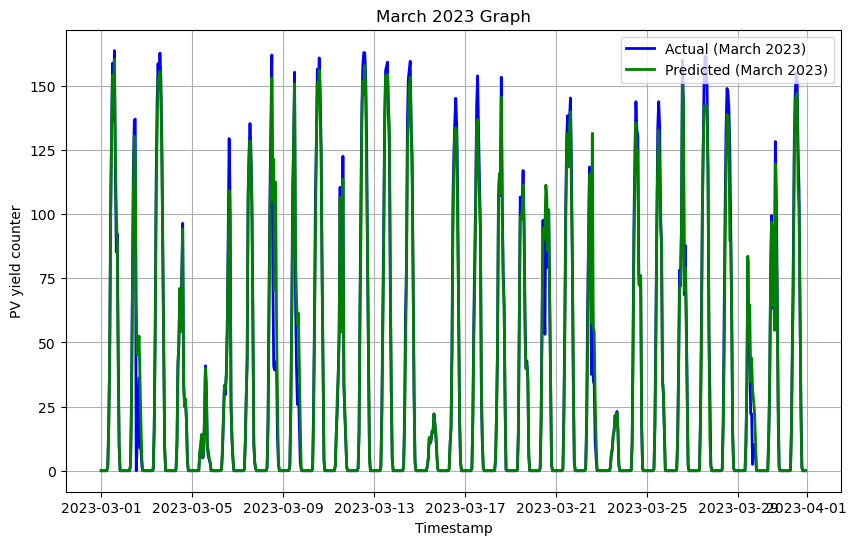

March 2023 Metrics:
MAE: 3.32
MSE: 66.13
RMSE: 8.13
R^2: 0.97
MAPE: 1.25%


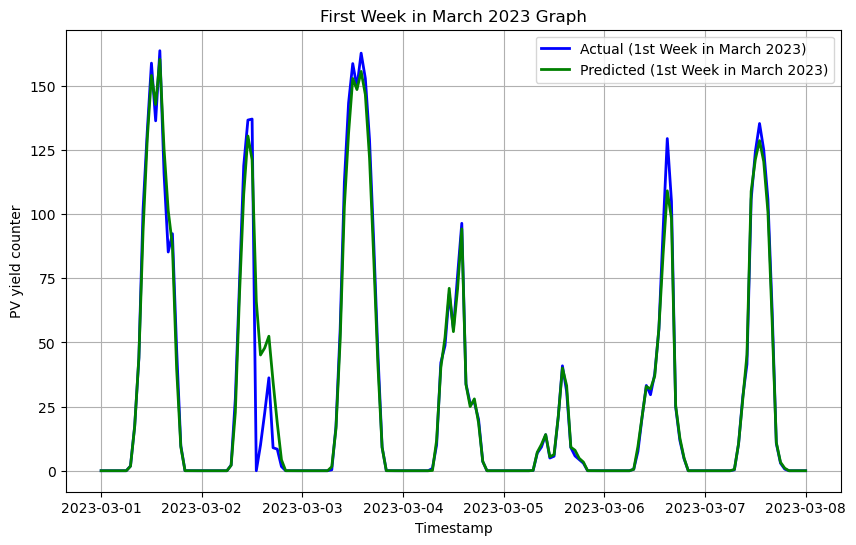

First Week in March 2023 Metrics:
MAE: 2.74
MSE: 56.65
RMSE: 7.53
R^2: 0.97
MAPE: 0.58%


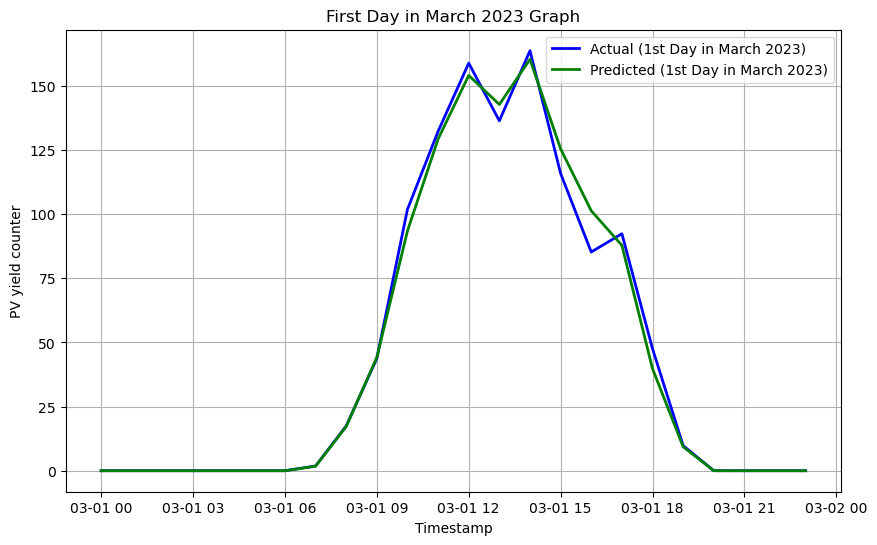

First Day in March 2023 Metrics:
MAE: 2.71
MSE: 24.40
RMSE: 4.94
R^2: 0.99
MAPE: 0.01%


In [36]:
# Filter data for March 2023
march_data = data[(data['Timestamp'].dt.year == 2023) & (data['Timestamp'].dt.month == 3)]

first_week_march_data = march_data[(march_data['Timestamp'] >= march_data['Timestamp'].iloc[0]) & 
                                        (march_data['Timestamp'] <= march_data['Timestamp'].iloc[0] + pd.DateOffset(7))]

first_day_march_data = march_data[(march_data['Timestamp'] >= march_data['Timestamp'].iloc[0]) & 
                                       (march_data['Timestamp'].dt.day == 1)]

X_march = march_data[features]
y_march_actual = march_data[target]

X_first_week_march = first_week_march_data[features]
y_first_week_march_actual = first_week_march_data[target]

X_first_day_march = first_day_march_data[features]
y_first_day_march_actual = first_day_march_data[target]


predictions_march = random_forest_model.predict(X_march)
predictions_first_week_march = random_forest_model.predict(X_first_week_march)
predictions_first_day_march = random_forest_model.predict(X_first_day_march)


mae_march = mean_absolute_error(y_march_actual, predictions_march)
mse_march = mean_squared_error(y_march_actual, predictions_march)
rmse_march = mean_squared_error(y_march_actual, predictions_march, squared=False)
r2_march = r2_score(y_march_actual, predictions_march)


average_y_march = y_march_actual.mean()
average_predictions_march = predictions_march.mean()
mape_march = abs((average_y_march - average_predictions_march) / average_y_march) * 100

mae_first_week_march = mean_absolute_error(y_first_week_march_actual, predictions_first_week_march)
mse_first_week_march = mean_squared_error(y_first_week_march_actual, predictions_first_week_march)
rmse_first_week_march = mean_squared_error(y_first_week_march_actual, predictions_first_week_march, squared=False)
r2_first_week_march = r2_score(y_first_week_march_actual, predictions_first_week_march)


average_y_first_week_march = y_first_week_march_actual.mean()
average_predictions_first_week_march = predictions_first_week_march.mean()
mape_first_week_march = abs((average_y_first_week_march - average_predictions_first_week_march) / average_y_first_week_march) * 100

mae_first_day_march = mean_absolute_error(y_first_day_march_actual, predictions_first_day_march)
mse_first_day_march = mean_squared_error(y_first_day_march_actual, predictions_first_day_march)
rmse_first_day_march = mean_squared_error(y_first_day_march_actual, predictions_first_day_march, squared=False)
r2_first_day_march = r2_score(y_first_day_march_actual, predictions_first_day_march)

average_y_first_day_march = y_first_day_march_actual.mean()
average_predictions_first_day_march = predictions_first_day_march.mean()
mape_first_day_march = abs((average_y_first_day_march - average_predictions_first_day_march) / average_y_first_day_march) * 100

plt.figure(figsize=(10, 6))
plt.plot(march_data['Timestamp'], y_march_actual, color='blue', label='Actual (March 2023)', linewidth=2)
plt.plot(march_data['Timestamp'], predictions_march, color='green', label='Predicted (March 2023)', linewidth=2)
plt.xlabel('Timestamp')
plt.ylabel('PV yield counter')
plt.title('March 2023 Graph')
plt.legend()
plt.grid(True)
plt.show()

print("March 2023 Metrics:")
print(f'MAE: {mae_march:.2f}')
print(f'MSE: {mse_march:.2f}')
print(f'RMSE: {rmse_march:.2f}')
print(f'R^2: {r2_march:.2f}')
print(f'MAPE: {mape_march:.2f}%')


plt.figure(figsize=(10, 6))
plt.plot(first_week_march_data['Timestamp'], y_first_week_march_actual, color='blue', label='Actual (1st Week in March 2023)', linewidth=2)
plt.plot(first_week_march_data['Timestamp'], predictions_first_week_march, color='green', label='Predicted (1st Week in March 2023)', linewidth=2)
plt.xlabel('Timestamp')
plt.ylabel('PV yield counter')
plt.title('First Week in March 2023 Graph')
plt.legend()
plt.grid(True)
plt.show()

print("First Week in March 2023 Metrics:")
print(f'MAE: {mae_first_week_march:.2f}')
print(f'MSE: {mse_first_week_march:.2f}')
print(f'RMSE: {rmse_first_week_march:.2f}')
print(f'R^2: {r2_first_week_march:.2f}')
print(f'MAPE: {mape_first_week_march:.2f}%')


plt.figure(figsize=(10, 6))
plt.plot(first_day_march_data['Timestamp'], y_first_day_march_actual, color='blue', label='Actual (1st Day in March 2023)', linewidth=2)
plt.plot(first_day_march_data['Timestamp'], predictions_first_day_march, color='green', label='Predicted (1st Day in March 2023)', linewidth=2)
plt.xlabel('Timestamp')
plt.ylabel('PV yield counter')
plt.title('First Day in March 2023 Graph')
plt.legend()
plt.grid(True)
plt.show()

print("First Day in March 2023 Metrics:")
print(f'MAE: {mae_first_day_march:.2f}')
print(f'MSE: {mse_first_day_march:.2f}')
print(f'RMSE: {rmse_first_day_march:.2f}')
print(f'R^2: {r2_first_day_march:.2f}')
print(f'MAPE: {mape_first_day_march:.2f}%')


# Optimiser

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

def optimize_random_forest(X_train, y_train, X_test, y_test, model):
    param_grid = {
        'n_estimators': [100, 150, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    scoring_metric = 'neg_mean_squared_error'

    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                               scoring=scoring_metric, cv=5, n_jobs=-1)

    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_

    predictions = best_model.predict(X_test)

    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    r2 = r2_score(y_test, predictions)

    print("Optimized Random Forest Parameters:")
    print(grid_search.best_params_)
    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    print(f'R^2 Score: {r2}')

    return best_model, mae, mse, rmse, r2

best_model, optimized_mae, optimized_mse, optimized_rmse, optimized_r2 = optimize_random_forest(X_train, y_train, X_test, y_test, random_forest_model)


Optimized Random Forest Parameters:
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Mean Absolute Error (MAE): 5.54734455989643
Mean Squared Error (MSE): 153.97173394681926
Root Mean Squared Error (RMSE): 12.40853472198951
R^2 Score: 0.9298820139573843
